# Leicester Miracle

## Introduction

The English Premier League (EPL) is the highest level of the English football league system. Founded in 1992, the EPL quickly surged to become the most popular and the most commercially successful football league in the world. The league consists of 20 teams who compete for the league title and avoid being relegated to the second level of English football.

The league boasts itself as the most competitive league in the world where any team can beat anyone. While only 6 teams, Manchester United, Manchester City, Chelsea, Arsenal, Tottenham Spurs, and Liverpool can consistently finish in the top positions, that premise still holds.

Leicester City's win of the English Premier League in the 2015/16 season is one of the most remarkable events of sports history. It is one of those rare and shocking sports events where a team wins a game or a trophy even when the odds are overwhelmingly against them. In Leicester's case, they were given a 5000-to-1 chance of becoming the league champions. Their victory is even more impressive when the fact that only 5 teams have been named champions since the league's founding in 1992. Four of those teams, Manchester United, Manchester City, Chelsea, and Arsenal significantly outspend Leicester on payroll and transfers. Leicester has only about a quarter of the financial resources compared to those teams. 

In this tutorial, we will look at the factors that led to Leicester's league title. Did they have an unstoppable attacking, a creative midfield, or an unbreakable defense? Did they build a fortress a home or did they do well in away games? We will gather football data to determine the team's performance and where they excelled at.  

## Getting Started

Below are the libraries that we will be using

In [1]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

#Things to talk about
#Goals scored/game, Goals conceded/game, possesion, clean sheets, shots, shots on target
#https://en.wikipedia.org/wiki/List_of_Leicester_City_F.C._seasons
#Is this a one time thing or is Leicester destined for greatness?
#Could they win the league this season?


## Collecting and Tidying Up Data

We will be scraping our data from various sources since most sources only cover a portion of what we need. For example, we will scrape one source for attacking data and another for defensive data as shown in the cell below.

As we can see from the table below, it contains lots NaN data. This is because of the way the table on the website was setup which caused extra columns of NaN to be created when we scraped the website. Which means that no data was missing. Also, the first two rows appears to contain the names of the respective columns. The most important data that this dataframe contains is team, win, draws, defeats, home wins, away wins, goals scored, goals conceded, goal difference, and league points.

In [30]:
#W/D/L Home, Away, and Overall
url = 'https://www.sportsmole.co.uk/football/premier-league/2015-16//table.html'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0'})
league_data = BeautifulSoup(r.content).find('table')
league_table = pd.read_html(league_data.prettify())
league_df = pd.DataFrame(league_table[0])
print(league_df)

     0                                1    2   3     4     5     6     7   \
0   NaN                              NaN  NaN NaN  Home  Home  Home  Home   
1   NaN                             Team    P NaN     W     D     L     F   
2     C        Leicester City  Leicester   38 NaN    12     6     1    35   
3     2                          Arsenal   38 NaN    12     4     3    31   
4     3         Tottenham Hotspur  Spurs   38 NaN    10     6     3    35   
5     4        Manchester City  Man City   38 NaN    12     2     5    47   
6     5       Manchester United  Man Utd   38 NaN    12     5     2    27   
7     6                      Southampton   38 NaN    11     3     5    39   
8     7        West Ham United  West Ham   38 NaN     9     7     3    34   
9     8                        Liverpool   38 NaN     8     8     3    33   
10    9                Stoke City  Stoke   38 NaN     8     4     7    22   
11   10                          Chelsea   38 NaN     5     9     5    32   

Here we will get rid of the first two rows. The resulting table has column names which are numbers which is not very helpful. We will have to rename these.

In [31]:
#Tidying up data
league_df = league_df.drop([0, 1])
league_df = league_df.reset_index(drop=True)
league_df = league_df.dropna(how='all', axis=1)

#The columns are
#Position, Team, Games played, 
#Home wins, Home draws, Home defeats, Home goals scored, Home goals conceded,
#Away wins, Away draws, Away defeats, Away goals scored, Away goals conceded,
#Total wins, Total draws, Total defeats, Total goals scored, Total goals conceded,
#Goal difference, Points
league_df = league_df.rename(columns={0: 'Position', 1: 'Team', 2: 'Games played', \
                                      4: 'Home wins', 5: 'Home draws', 6: 'Home defeats', 7: 'Home goals scored', 8: 'Home goals conceded', \
                                      10: 'Away wins', 11: 'Away draws', 12: 'Away defeats', 13: 'Away goals scored', 14: 'Away goals conceded', \
                                     16: 'Total wins', 17: 'Total draws', 18: 'Total defeats', 19: 'Total goals scored', 20: 'Total goals conceded', \
                                     22: 'Goal Difference', 23: 'Points'})

league_df = league_df.drop(columns=['Games played', 'Home draws', 'Home defeats', 'Home goals scored', 'Home goals conceded',\
                                   'Away draws', 'Away defeats', 'Away goals scored', 'Away goals conceded'])
print(league_df)


   Position                             Team Home wins Away wins Total wins  \
0         C        Leicester City  Leicester        12        11         23   
1         2                          Arsenal        12         8         20   
2         3         Tottenham Hotspur  Spurs        10         9         19   
3         4        Manchester City  Man City        12         7         19   
4         5       Manchester United  Man Utd        12         7         19   
5         6                      Southampton        11         7         18   
6         7        West Ham United  West Ham         9         7         16   
7         8                        Liverpool         8         8         16   
8         9                Stoke City  Stoke         8         6         14   
9        10                          Chelsea         5         7         12   
10       11                          Everton         6         5         11   
11       12            Swansea City  Swansea        

Like the table above, the table below also contains lots of NaN data. This is because the table from the website contains lots of missing data which we don't need. We only want the possesion percentages. Also, the first 20 rows are completely redundant.

In [37]:
#posession
url = 'https://fbref.com/en/comps/9/1467/possession/2015-2016-Premier-League-Stats'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'})
data = BeautifulSoup(r.content).find('table')
table = pd.read_html(data.prettify())
possession_df = pd.DataFrame(table[0])
print(possession_df)

    Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                 Squad               # Pl               Poss   
0           vs Arsenal                 25               41.7   
1       vs Aston Villa                 29               53.6   
2       vs Bournemouth                 28               48.8   
3           vs Chelsea                 28               43.8   
4    vs Crystal Palace                 30               54.2   
5           vs Everton                 31               48.1   
6    vs Leicester City                 23               57.4   
7         vs Liverpool                 34               42.8   
8   vs Manchester City                 25               43.1   
9    vs Manchester Utd                 33               41.5   
10    vs Newcastle Utd                 31               53.4   
11     vs Norwich City                 28               54.0   
12      vs Southampton                 26               50.8   
13       vs Stoke City                 2

Here we will remove the first 20 rows and all columns with NaN and redundant info.

In [38]:
#removing the first two rows
possession_df = possession_df.drop([0, 1])
possession_df = possession_df.reset_index(drop=True)
possession_df = possession_df.dropna(how='all', axis=1)

#removing redundant rows
possession_df = possession_df.drop(possession_df.index[0:18])
possession_df = possession_df.reset_index(drop=True)

#renaming the columns
possession_df.columns = possession_df.columns.get_level_values(1)
possession_df = possession_df.rename(columns={'Squad': 'Team'})

#removing redundany column
possession_df = possession_df.drop(columns=['# Pl', '90s'])

print(possession_df)

               Team  Poss
0           Arsenal  58.3
1       Aston Villa  46.4
2       Bournemouth  51.2
3           Chelsea  56.2
4    Crystal Palace  45.8
5           Everton  51.9
6    Leicester City  42.6
7         Liverpool  57.2
8   Manchester City  56.9
9    Manchester Utd  58.5
10    Newcastle Utd  46.6
11     Norwich City  46.0
12      Southampton  49.2
13       Stoke City  49.7
14       Sunderland  41.0
15     Swansea City  52.5
16        Tottenham  57.4
17          Watford  45.1
18        West Brom  39.8
19         West Ham  48.4


The table below contains defensive stats. The most important data from this table is clean sheets.

In [22]:
#Defensive stats
#Goal against, goal against / game, clean sheets
url = 'https://www.sportsmole.co.uk/football/premier-league/2015-16/best-defence.html'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'})
defensive_data = BeautifulSoup(r.content).find('table')
defensive_table = pd.read_html(defensive_data.prettify())
defensive_df = pd.DataFrame(defensive_table[0])
print(defensive_df)

       0                     1              2             3             4
0    NaN                  Team  Goals against  Avg per game  Clean Sheets
1    1.0     Manchester United             35          0.92            18
2    2.0     Tottenham Hotspur             35          0.92            13
3    3.0               Arsenal             36          0.95            18
4    4.0        Leicester City             36          0.95            15
5    5.0       Manchester City             41          1.08            16
6    6.0           Southampton             41          1.08            12
7    7.0  West Bromwich Albion             48          1.26            11
8    8.0             Liverpool             50          1.32            11
9    9.0               Watford             50          1.32            11
10  10.0        Crystal Palace             51          1.34             8
11  11.0       West Ham United             51          1.34            11
12  12.0          Swansea City        

As we can see from this table, the first row is contains the name of the columns while the column names themeselves are numbers. We will have to rename the columns and remove the first row.

In [39]:
#drop first row
defensive_df = defensive_df.drop([0])
defensive_df = defensive_df.reset_index(drop=True)

#renaming the columns
defensive_df = defensive_df.drop(columns=[0])
defensive_df = defensive_df.rename(columns={1: 'Team', 2: 'Goals against', 3: 'Goals conceded per game', 4: 'Clean sheets'})

print(defensive_df)

                    Team Goals against Goals conceded per game Clean sheets
0      Manchester United            35                    0.92           18
1      Tottenham Hotspur            35                    0.92           13
2                Arsenal            36                    0.95           18
3         Leicester City            36                    0.95           15
4        Manchester City            41                    1.08           16
5            Southampton            41                    1.08           12
6   West Bromwich Albion            48                    1.26           11
7              Liverpool            50                    1.32           11
8                Watford            50                    1.32           11
9         Crystal Palace            51                    1.34            8
10       West Ham United            51                    1.34           11
11          Swansea City            52                    1.37            9
12          

The Premier League website contains most the data that we need. However, it is difficult to get the data from the 2015/16 season using simple web scrapping methods since the website doesn't appear to be static. Rather, it appears that the data is loaded from a server which always defaults into the 2020/21 season. Since we already have most of the data we need from website scrapping, we will copy the rest of what we need from the Premier League website into an excel file and convert that into a CSV file. 

This table contains number of passes, saves, shots, tackles, yellow cards, and red cards.

In [41]:
extra_df = pd.read_csv("premier_league_stats.csv") 
extra_df.head()

,Team,Passes,Shots,Saves,Tackles,Yellow Cards,Red Cards
0,Arsenal,"21,249",571,118,709,40,4
1,Manchester City,"20,488",615,86,729,61,0
2,Manchester United,"20,070",430,90,760,65,1
3,Liverpool,"19,733",629,81,871,61,3
4,Chelsea,"19,664",526,122,790,58,5


In order to organize our data, we will have different dataframes for each portion of the data. Thankfully, our data is already organized since we are already scrapping different websites for each portion of what we need. Each website will have its own dataframe. 

## Exploratory Analysis and Data Visualization

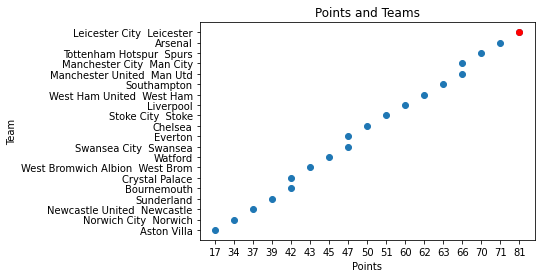

In [7]:
#confirm that Leicester is the winning team
fig, ax = plt.subplots()
#What are you doing in the line below?
league_df.sort_values(by=['Points'], inplace=True)
ax.scatter(x=league_df['Points'], y=league_df['Team'])

lc = league_df[league_df['Team'] == 'Leicester City  Leicester']

ax.scatter(x=lc['Points'], y=lc['Team'], c='red')
plt.title("Points and Teams")
plt.xlabel("Points")
plt.ylabel("Team")
plt.show()

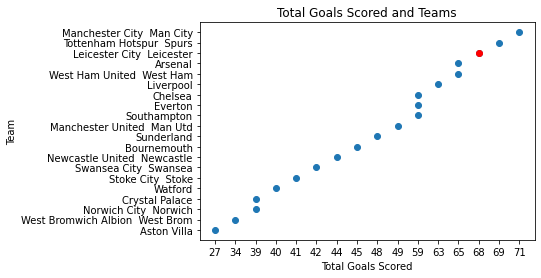

In [8]:
#Check number of goals scored
fig, ax = plt.subplots()
league_df.sort_values(by=['Total goals scored'], inplace=True)
ax.scatter(x=league_df['Total goals scored'], y=league_df['Team'])

lc = league_df[league_df['Team'] == 'Leicester City  Leicester']

ax.scatter(x=lc['Total goals scored'], y=lc['Team'], c='red')
plt.title("Total Goals Scored and Teams")
plt.xlabel("Total Goals Scored")
plt.ylabel("Team")
plt.show()

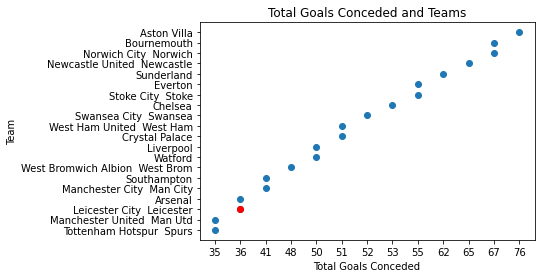

In [9]:
#Check number of goals scored
fig, ax = plt.subplots()
league_df.sort_values(by=['Total goals conceded'], inplace=True)
ax.scatter(x=league_df['Total goals conceded'], y=league_df['Team'])

lc = league_df[league_df['Team'] == 'Leicester City  Leicester']

ax.scatter(x=lc['Total goals conceded'], y=lc['Team'], c='red')
plt.title("Total Goals Conceded and Teams")
plt.xlabel("Total Goals Conceded")
plt.ylabel("Team")
plt.show()

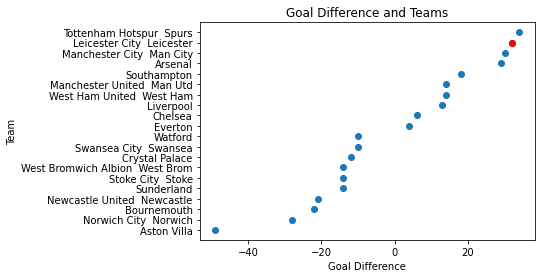

In [10]:
#Defense
#league_df['Goal Difference'] is a string, needs to be an int or it will mess with the graph
for index, row in league_df.iterrows():
    league_df['Goal Difference'][index] = int(row['Goal Difference'])
fig, ax = plt.subplots()
league_df.sort_values(by=['Goal Difference'], inplace=True)
ax.scatter(x=league_df['Goal Difference'], y=league_df['Team'])

lc = league_df[league_df['Team'] == 'Leicester City  Leicester']

ax.scatter(x=lc['Goal Difference'], y=lc['Team'], c='red')
plt.title("Goal Difference and Teams")
plt.xlabel("Goal Difference")
plt.ylabel("Team")
plt.show()

In [42]:
#adding extra data to the other dataframes
atk_dict = {'Team': extra_df['Team'], 'Shots': extra_df['Shots']}
attacking_df = pd.DataFrame(atk_dict)
print(attacking_df)

                    Team  Shots
0                Arsenal    571
1        Manchester City    615
2      Manchester United    430
3              Liverpool    629
4                Chelsea    526
5      Tottenham Hotspur    659
6           Swansea City    441
7                Everton    491
8        AFC Bournemouth    464
9             Stoke City    419
10           Southampton    519
11           Aston Villa    380
12      Newcastle United    397
13       West Ham United    558
14               Watford    446
15          Norwich City    418
16        Crystal Palace    469
17        Leicester City    522
18            Sunderland    439
19  West Bromwich Albion    388
